# 1️⃣ 외부 데이터 작업 (쇼핑거래액, 워드클라우드)

### <span style="color:orange">모바일 쇼핑 거래액 데이터 시각화</span>

In [1]:
# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
import datetime as dt # 날짜 라이브러리
from datetime import datetime
pd.set_option('display.max_columns', None) # 모든 열을 출력한다.

# 기본 시각화 라이브러리 임포트
import matplotlib.pyplot as plt
import seaborn as sns # sns.reset_defaults() : Seaborn 라이브러리 설정 초기화(기본값)
from matplotlib import rc
%matplotlib inline

# 기본 한글 폰트로 설정
rc("font", family="AppleGothic") # 맥의 경우
# rc("font", family="Malgun Gothic") # 윈도우의 경우

# 음수 부호까지 제대로 표시되도록 설정 추가
plt.rcParams['axes.unicode_minus'] = False

# plolty 시각화 라이브러리 [PPT용으로는 별로임]
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "iframe"

# 경고 메시지 무시 [따로 코드 둬야 적용 됨;]
import random, warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category = DeprecationWarning)

In [2]:
E_df = pd.read_csv("/Users/raekkkky/Desktop/Real Ecommerce Data Analysis/data/External Data/online_shopping_survey.csv")
E_df.head()

,지역별(1),지역별(2),지역별(3),상품군별(1),상품군별(2),판매유형별(1),2023.4/4,2024.1/4 p),2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,합계,소계,소계,합계,소계,계,471927,399086,679128,1259874,2293380,3034634,3626523,6004608,6003447,4407910,1855899,1697209
1,합계,소계,소계,합계,소계,면세점,280391,239885,-,-,-,2403530,2923424,5219858,5007939,3423791,1028846,944338
2,합계,소계,소계,합계,소계,면세점 이외,191536,159201,-,-,-,631104,703099,784750,995508,984119,827053,752871
3,합계,소계,소계,컴퓨터 및 주변기기,소계,계,3769,2729,16408,13452,14334,8907,17921,15237,19267,15875,12370,15278
4,합계,소계,소계,컴퓨터 및 주변기기,소계,면세점,0,0,-,-,-,14,224,73,3610,0,0,0


In [4]:
E_df = E_df.head(1)

In [6]:
E_df.head(1)

,지역별(1),지역별(2),지역별(3),상품군별(1),상품군별(2),판매유형별(1),2023.4/4,2024.1/4 p),2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,합계,소계,소계,합계,소계,계,471927,399086,679128,1259874,2293380,3034634,3626523,6004608,6003447,4407910,1855899,1697209


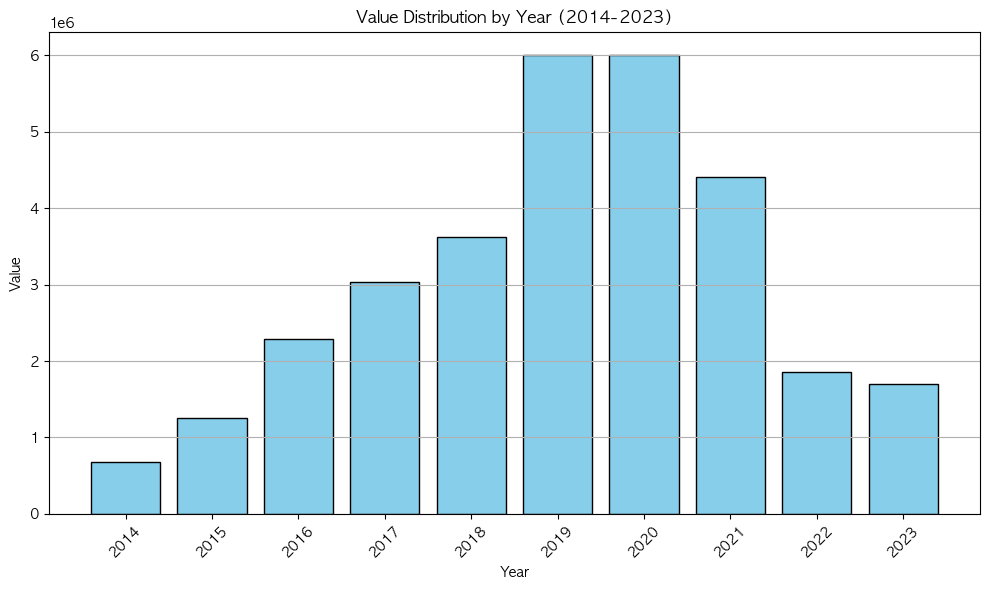

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# 2014년부터 2023년까지의 연도와 값을 가지는 데이터프레임 생성
data = {
    '날짜': [str(year) for year in range(2014, 2024)],
    '값': E_df.loc[0, '2014':'2023'].values.astype(float)
}

# 새로운 데이터프레임 생성
pivot_df = pd.DataFrame(data)

# 히스토그램 그리기
plt.figure(figsize=(10, 6))
plt.bar(pivot_df['날짜'], pivot_df['값'], color='skyblue', edgecolor='black')
plt.title('Value Distribution by Year (2014-2023)')
plt.xlabel('Year')
plt.ylabel('Value')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# 결론 : 온라인 쇼핑 거래액 전체로 봤을때는 2019년과 2020년 이후 감소하는 추세임
# 하지만, 모바일 쇼핑 거래액의 경우 증가함. 즉, 코로나 시기에 비해 거래액은 감소했지만, 그만큼 모바일 편의성이 좋아져서
# 모바일(핸드폰)으로 구매하는 경우가 더 많아졌다 이거임. (이건 굳이 모바일 쇼핑 데이터 가져와서 시각화할 필요 없을 듯)
# 출처 : 통계청, 2023 온라인 쇼핑 거래액 뉴스

### <span style="color:orange">Google에 Ecommerce 단어 관련 뉴스 제목 크롤링 및 워드클라우드</span>

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

def get_news_titles(query, num_pages):
    titles = []
    base_url = "https://www.google.com/search?q={}&tbm=nws&start={}"
    
    for page in range(num_pages):
        start = page * 10
        url = base_url.format(query, start)
        response = requests.get(url, headers={'User-Agent': 'Mozilla/5.0'})
        
        if response.status_code == 200:
            soup = BeautifulSoup(response.text, 'html.parser')
            for item in soup.find_all('div', class_='BNeawe vvjwJb AP7Wnd'):
                titles.append(item.get_text())
        else:
            print(f"페이지 {page + 1} 가져오기 실패")
        
        time.sleep(1)  # 서버에 부담을 주지 않도록 1초 지연
    
    return titles

# 파라미터 설정
query = "Ecommerce"
num_pages = 10

# 뉴스 제목 가져오기
news_titles = get_news_titles(query, num_pages)

# DataFrame에 저장
df = pd.DataFrame(news_titles, columns=["Title"])

# DataFrame을 CSV 파일로 저장
df.to_csv("/Users/raekkkky/Desktop/Real Ecommerce Data Analysis/data/External Data/ecommerce_news_titles.csv", index=False)

print("크롤링 완료. 제목들이 ecommerce_news_titles.csv에 저장되었습니다.")

크롤링 완료. 제목들이 ecommerce_news_titles.csv에 저장되었습니다.


[nltk_data] Downloading package punkt to /Users/raekkkky/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/raekkkky/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


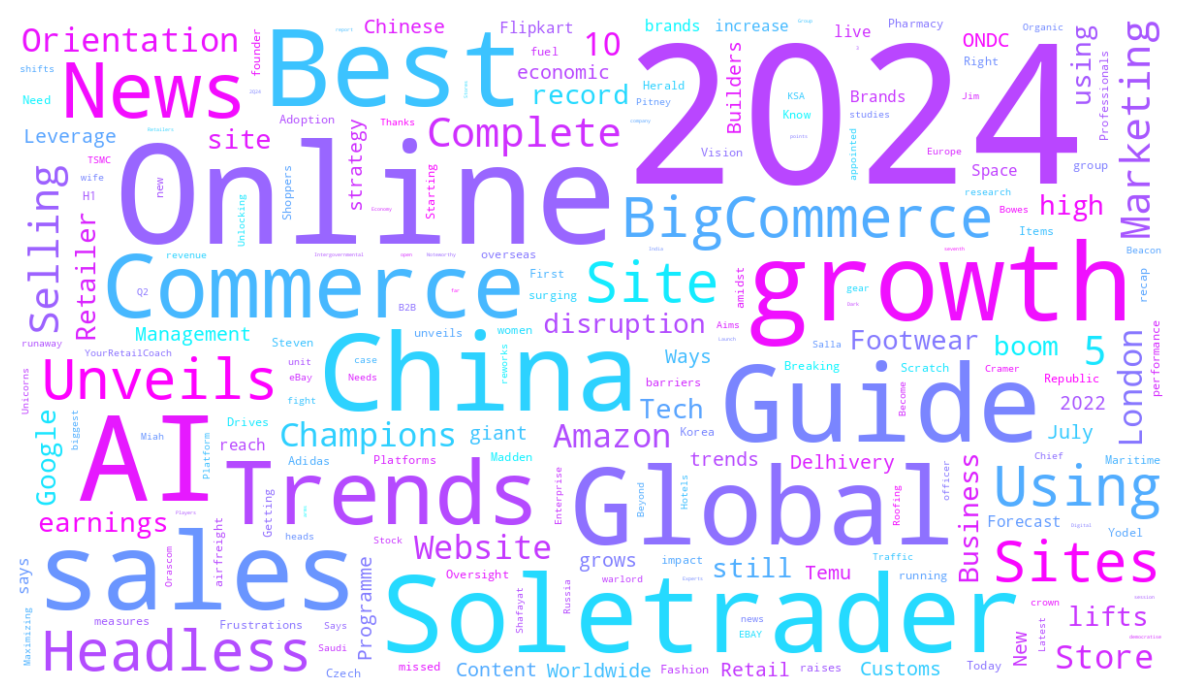

In [12]:
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# NLTK 데이터 다운로드 (최초 실행 시 필요)
nltk.download('punkt')
nltk.download('stopwords')

# 데이터 로드
df = pd.read_csv("/Users/raekkkky/Desktop/Real Ecommerce Data Analysis/data/External Data/ecommerce_news_titles.csv")

# 제목 데이터를 하나의 문자열로 결합
text = " ".join(df['Title'].tolist())

# 영어 불용어 설정
stop_words = set(stopwords.words('english'))
custom_stop_words = {'ecommerce', 'eCommerce'}
stop_words.update(custom_stop_words)

# 단어 토큰화 및 불용어 제거
words = word_tokenize(text)
filtered_words = [word for word in words if word.isalnum() and word.lower() not in stop_words]

# 명사 빈도수 계산 (영어는 별도의 명사 추출이 필요하지 않음)
count = Counter(filtered_words)

# 워드클라우드 생성
wordcloud = WordCloud(
    width=1200,
    height=700,
    background_color='white',
    colormap='cool',
    prefer_horizontal=0.9,  # 글자를 가로로 배치하는 비율 설정
    max_font_size=200,  # 최대 글자 크기
    margin=20           # 가장자리 여백 설정
).generate_from_frequencies(count)

# 워드클라우드 시각화
plt.figure(figsize=(15, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()